# Stochastic Gradient Descent (SGD)

## Load Dataset from sklearn

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [43]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [44]:
df = pd.DataFrame(california.data, columns=california.feature_names)
df["Target"] = california.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

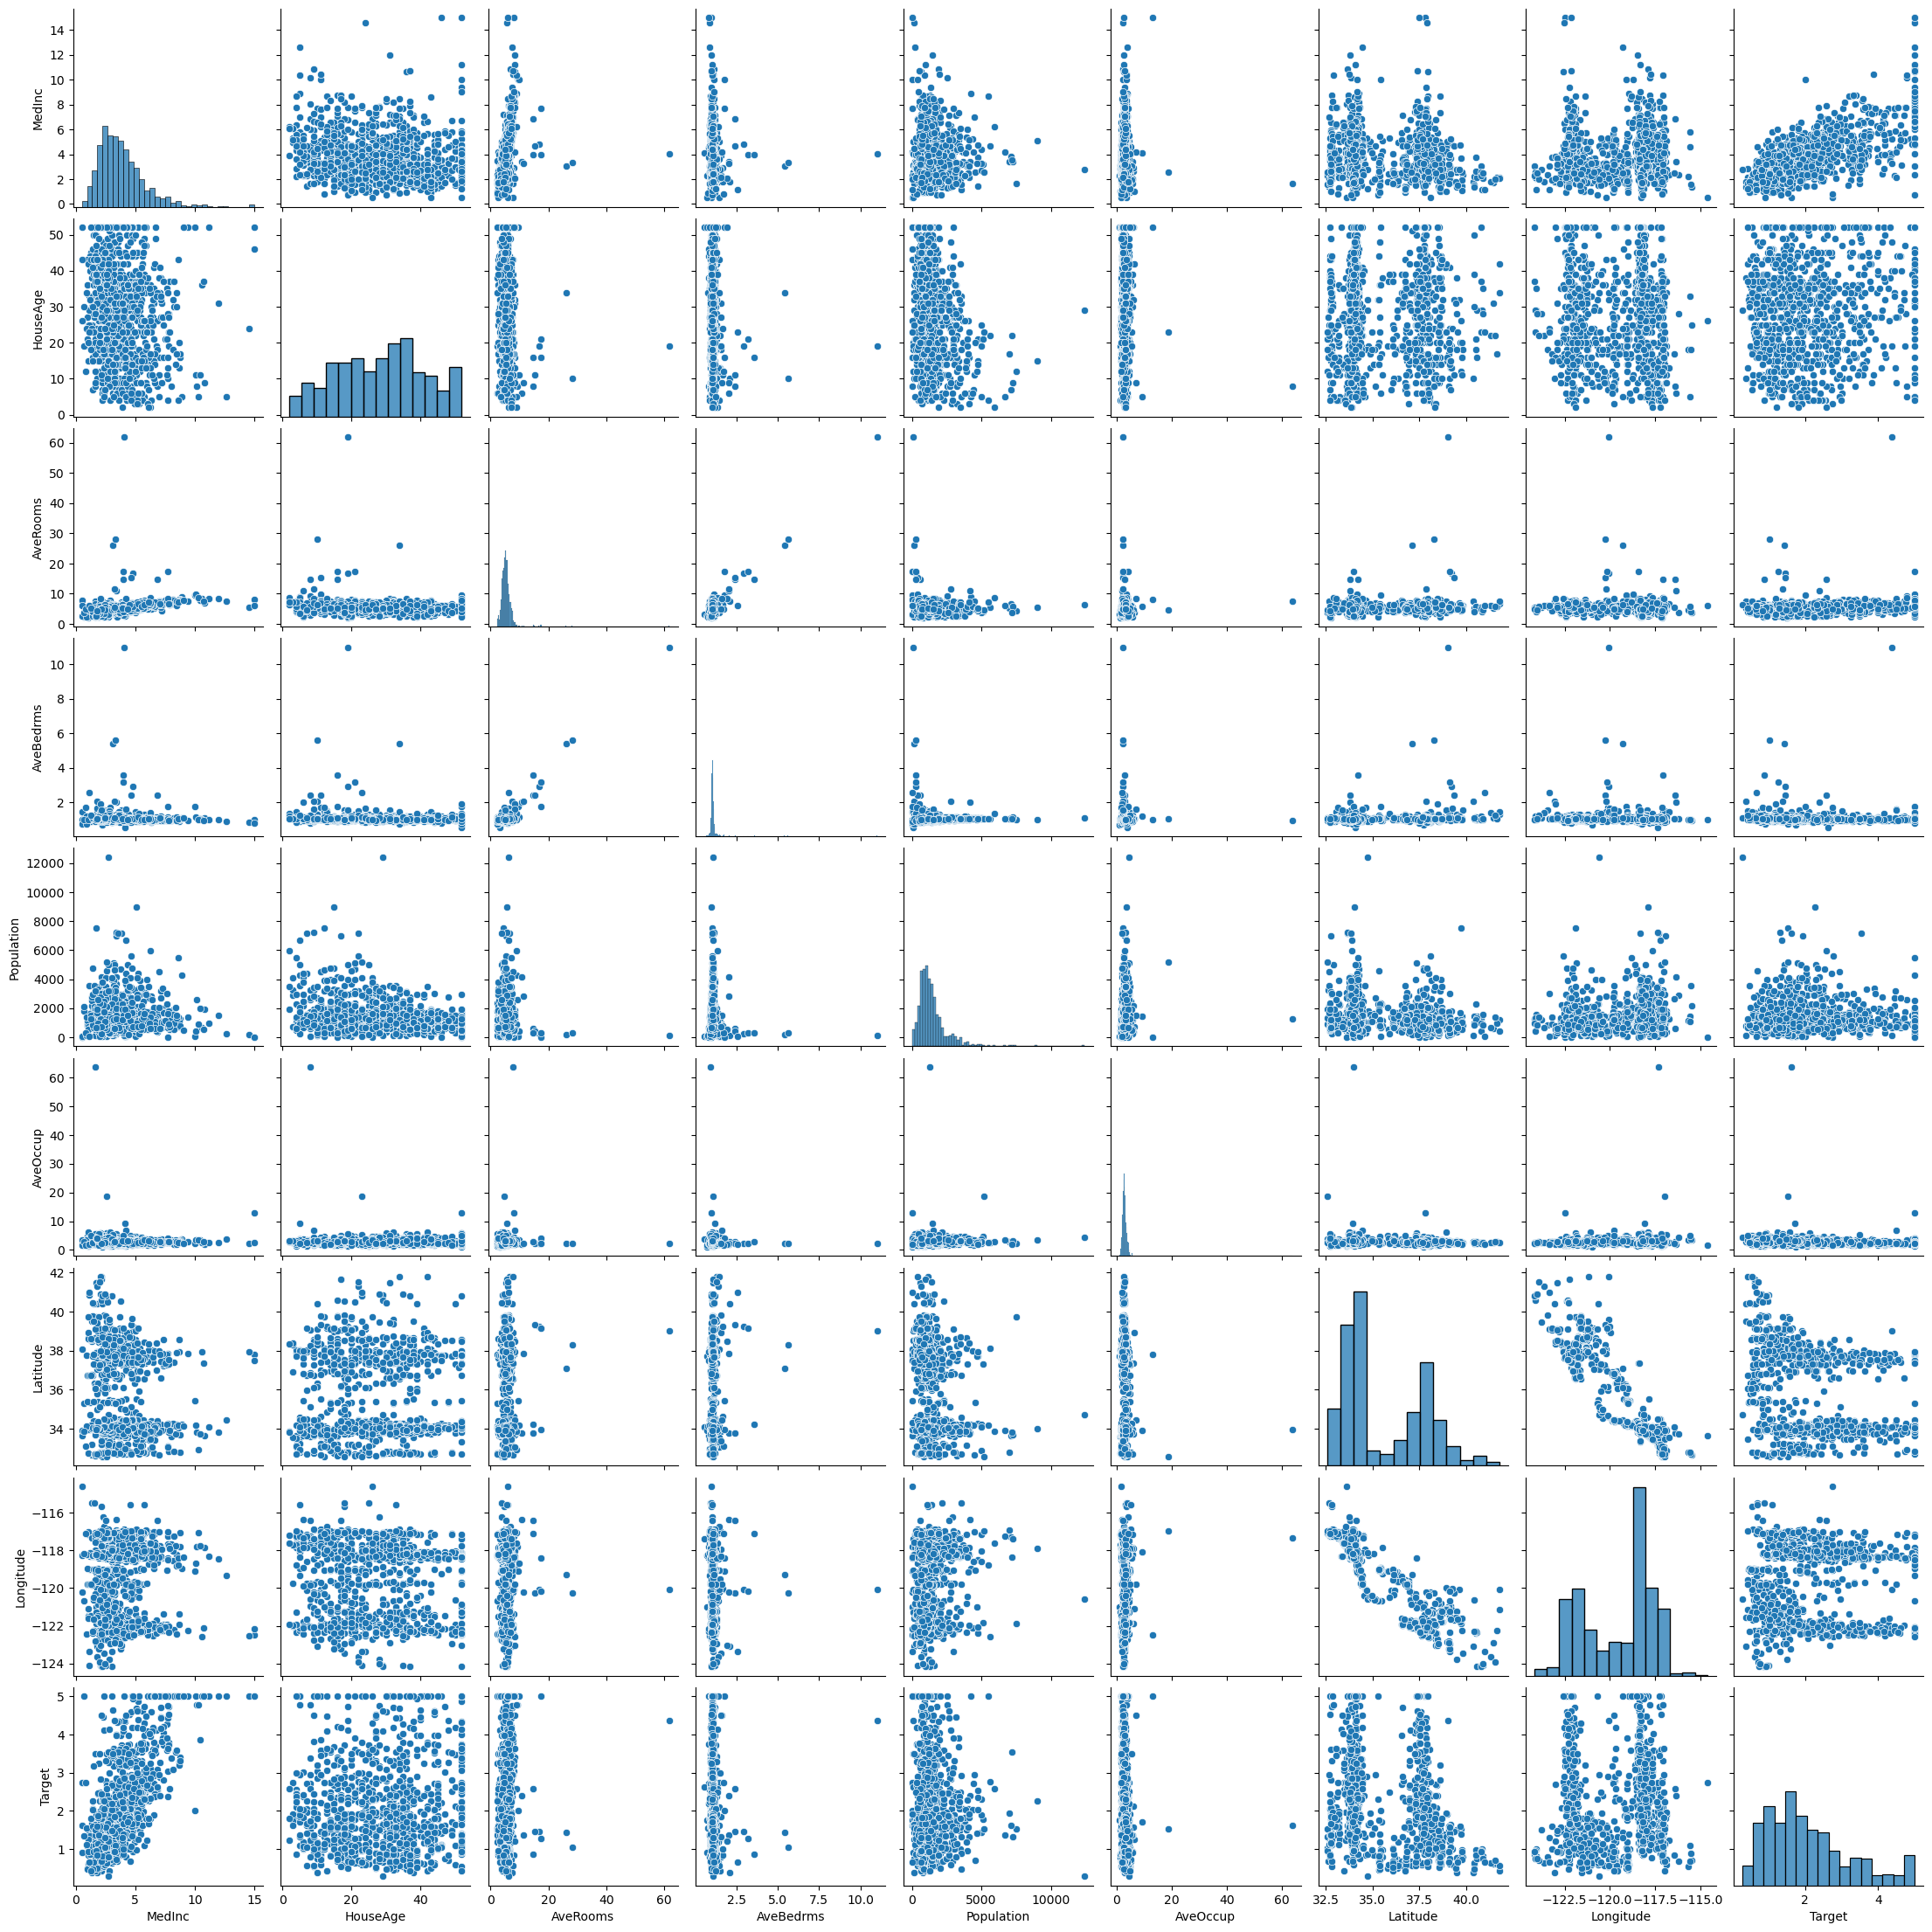

In [45]:
sns.pairplot(df.sample(1000))
plt.show()

In [50]:
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [51]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.781
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.771
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.923
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.847
20639,-0.780129,-1.004309,-0.070443,0.138403,-0.033977,-0.043682,1.750146,-0.833696,0.894


c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

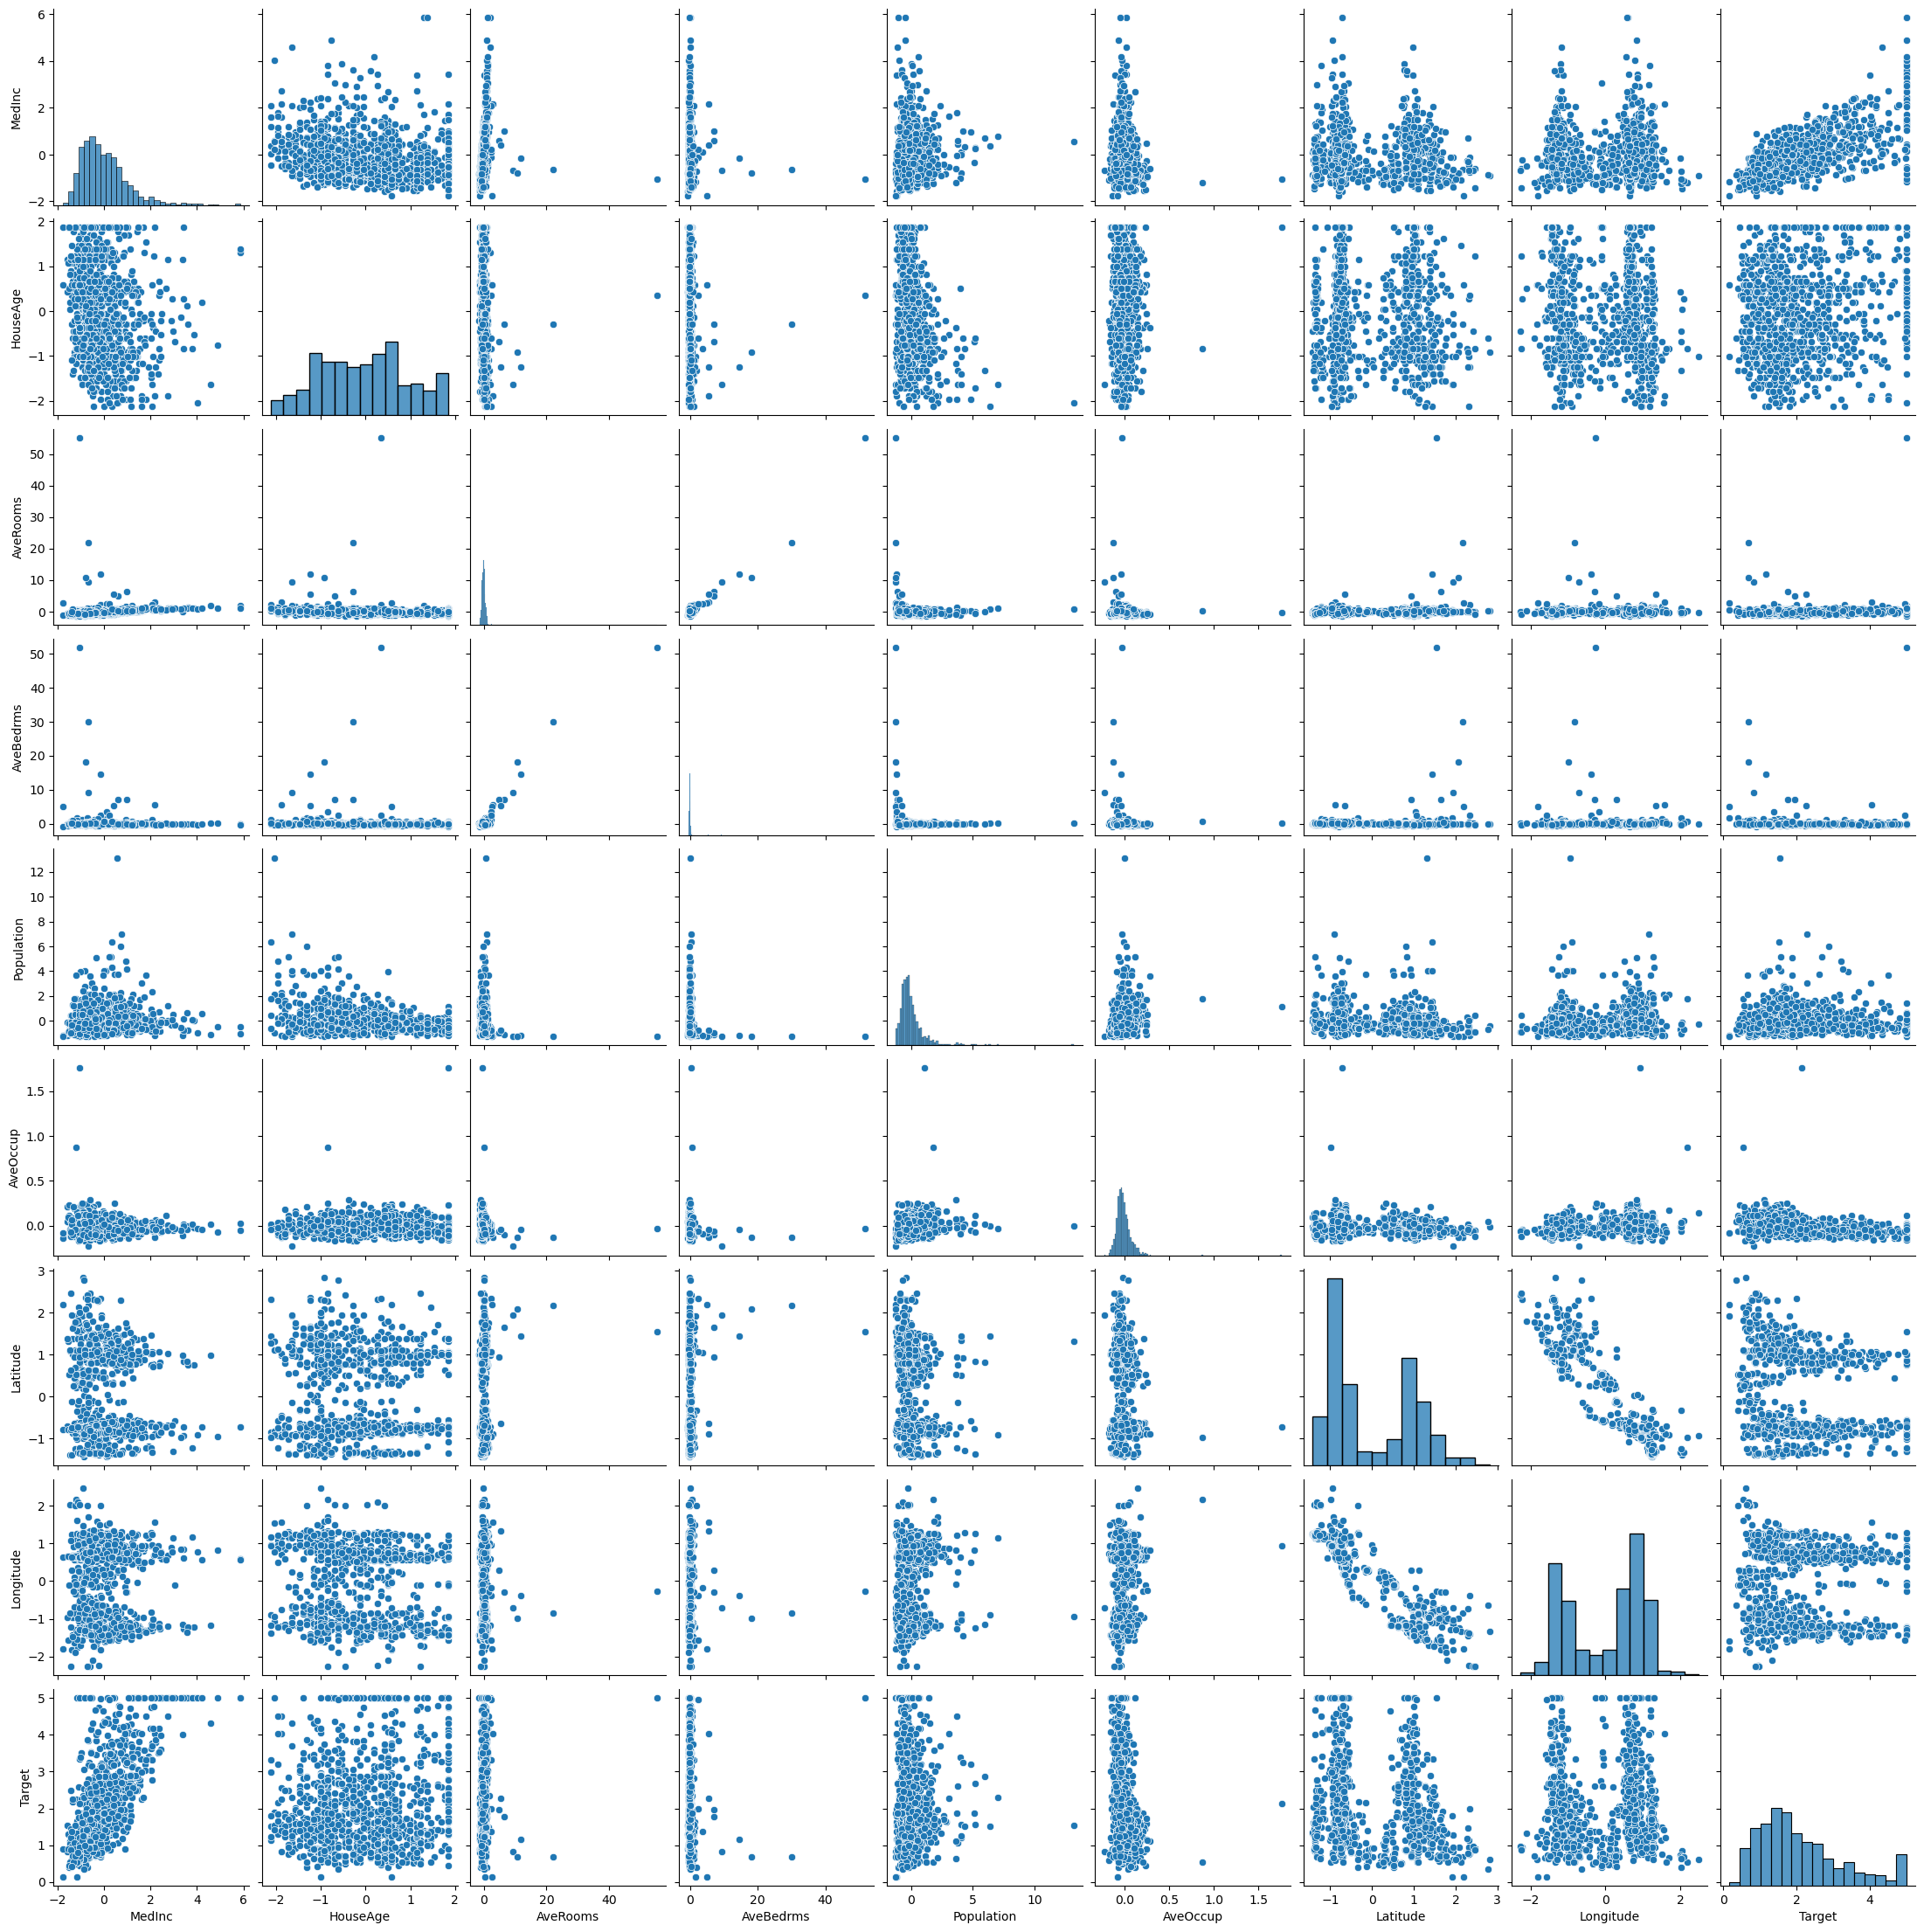

In [52]:
sns.pairplot(df.sample(1000))
plt.show()

## Train Model with PyTorch

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [54]:
df.values

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  1.05254828,
        -1.32783522,  4.526     ],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  1.04318455,
        -1.32284391,  3.585     ],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.03850269,
        -1.33282653,  3.521     ],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ...,  1.77823747,
        -0.8237132 ,  0.923     ],
       [-1.05458292, -0.84539315, -0.04021111, ...,  1.77823747,
        -0.87362627,  0.847     ],
       [-0.78012947, -1.00430931, -0.07044252, ...,  1.75014627,
        -0.83369581,  0.894     ]])

In [55]:
data = torch.from_numpy(df.values).float()

data.shape

torch.Size([20640, 9])

In [56]:
x = data[:, :-1]
y = data[:, -1:]

print(x)
print()
print(y)

print(x.shape, y.shape)

tensor([[ 2.3448,  0.9821,  0.6286,  ..., -0.0496,  1.0525, -1.3278],
        [ 2.3322, -0.6070,  0.3270,  ..., -0.0925,  1.0432, -1.3228],
        [ 1.7827,  1.8562,  1.1556,  ..., -0.0258,  1.0385, -1.3328],
        ...,
        [-1.1426, -0.9249, -0.0903,  ..., -0.0717,  1.7782, -0.8237],
        [-1.0546, -0.8454, -0.0402,  ..., -0.0912,  1.7782, -0.8736],
        [-0.7801, -1.0043, -0.0704,  ..., -0.0437,  1.7501, -0.8337]])

tensor([[4.5260],
        [3.5850],
        [3.5210],
        ...,
        [0.9230],
        [0.8470],
        [0.8940]])
torch.Size([20640, 8]) torch.Size([20640, 1])


In [57]:
n_epochs = 4000
batch_size = 256
print_interval = 200
learning_rate = 1e-2

## Build Models

In [58]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 6),
    nn.LeakyReLU(),
    nn.Linear(6, 5),
    nn.LeakyReLU(),
    nn.Linear(5, 4),
    nn.LeakyReLU(),
    nn.Linear(4, 3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1)),
)

model

Sequential(
  (0): Linear(in_features=8, out_features=6, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
)

In [59]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [60]:
# |x| = (total_size, input_dim) # 전체 데이터 개수, 입력 차원
# |y| = (total_size, output_dim) # 전체 데이터 개수, 출력 차원

for i in range(n_epochs):
    # Shuffle the index to feed-forward.
    indices = torch.randperm(x.size(0)) 
    # 랜덤수열 생성
    # 각 에폭(epoch)마다 데이터를 무작위로 섞어 모델 학습에 편향이 생기지 않도록
    x_ = torch.index_select(x, dim=0, index=indices)
    y_ = torch.index_select(y, dim=0, index=indices)
    
    # 데이터를 배치(batch) 단위로 나누기 
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)
    # |x_[i]| = (batch_size, input_dim) # (256, 8)
    # |y_[i]| = (batch_size, output_dim) # (256, 1)
    
    y_hat = []
    total_loss = 0
    
    for x_i, y_i in zip(x_, y_):
        # |x_i| = |x_[i]|
        # |y_i| = |y_[i]|
        y_hat_i = model(x_i)  
        # 모델에 입력데이터 넣어, 예측값 얻기 
        loss = F.mse_loss(y_hat_i, y_i)
        # 평균 제곱 오차(MSE) 손실 함수
        # 예측값과 실제값 사이의 오차를 계산

        optimizer.zero_grad()
        # 이전에 계산된 gradient를 초기화
        loss.backward()
        # 오차 역전파 

        optimizer.step()
        # 계산된 gradient를 사용하여 모델의 매개변수를 업데이트
        
        total_loss += float(loss) 
        # This is very important to prevent memory leak.
        y_hat += [y_hat_i]

    total_loss = total_loss / len(x_)
    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, total_loss))
    
# 각 배치별로 저장된 예측값을 하나의 텐서로 합치기     
y_hat = torch.cat(y_hat, dim=0)
y = torch.cat(y_, dim=0)
# |y_hat| = (total_size, output_dim) # (전체데이터 수, 출력 차원)
# |y| = (total_size, output_dim)

Epoch 200: loss=3.4552e-01
Epoch 400: loss=3.3595e-01
Epoch 600: loss=3.3467e-01
Epoch 800: loss=3.3108e-01
Epoch 1000: loss=3.1500e-01
Epoch 1200: loss=3.0849e-01
Epoch 1400: loss=3.0383e-01
Epoch 1600: loss=3.0128e-01
Epoch 1800: loss=3.0032e-01
Epoch 2000: loss=2.9819e-01
Epoch 2200: loss=2.9840e-01
Epoch 2400: loss=2.9794e-01
Epoch 2600: loss=2.9705e-01
Epoch 2800: loss=2.9692e-01
Epoch 3000: loss=2.9620e-01
Epoch 3200: loss=2.9661e-01
Epoch 3400: loss=2.9598e-01
Epoch 3600: loss=2.9546e-01
Epoch 3800: loss=2.9636e-01
Epoch 4000: loss=2.9583e-01


## Let's see the result!

c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


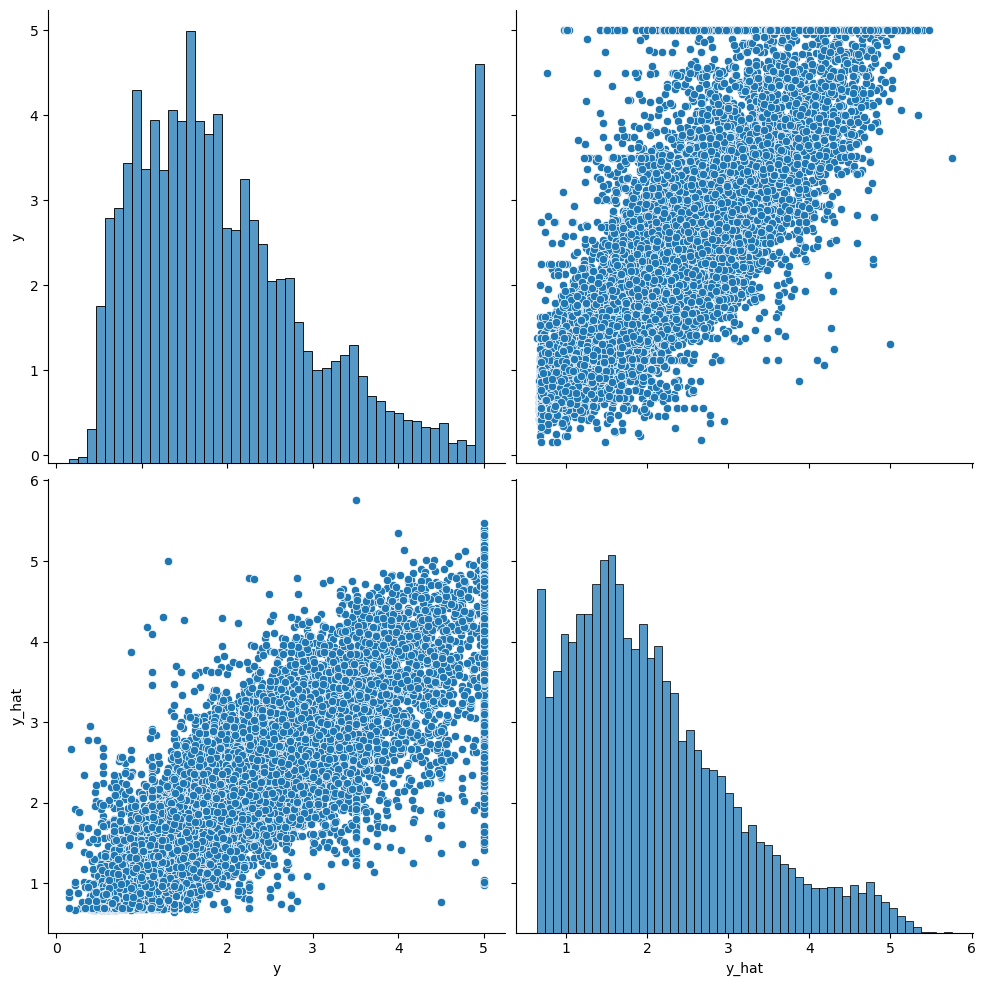

In [61]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()